# **Mushroom**

https://archive.ics.uci.edu/dataset/73/mushroom

## **1. Chuẩn bị dữ liệu**

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

- Config

In [2]:
class CONFIG:
    # Giá trị ngẫu nhiên
    random_state = None

    # Tỷ lệ chia tập dữ liệu
    split_ratios = {
        '40/60': 0.4,
        '60/40': 0.6,
        '80/20': 0.8,
        '90/10': 0.9
    }

    # Giá trị mặc định để kiểm tra độ sâu và độ chính xác
    default_split = '80/20'

    # Đường dẫn file dữ liệu gốc
    raw_data_path = "Raw/agaricus-lepiota.data"

    # Thư mục lưu kết quả các phân phối
    distribution_dataset_dir = "Results/DistributedDataset"

    # Thư mục lưu kết quả cây quyết định với các tỉ lệ
    tree_visual_split_dir = "Results/TreeVisualizationsBySplit"

    # Thư mục lưu kết quả thử nghiệm max_depth cho cây quyết định
    tree_visual_max_depth_dir = "Results/TreeVisualizationsWithMaxDepth"

    # Thư mục lưu kết quả trực quan hóa
    visual_confusion_matrix_dir = "Results/VisualizationConfusionMatrix"

    # Giá trị độ sâu tối đa cho thử nghiệm cây quyết định
    max_depth_values = [None, 2, 3, 4, 5, 6, 7]

- Dữ liệu được lấy từ *https://archive.ics.uci.edu/dataset/73/mushroom*

#### **1. Đọc dữ liệu**

In [3]:
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
data = pd.read_csv(CONFIG.raw_data_path, header=None, names=columns)

- Kiểm tra dữ liệu

In [4]:
# Kiểm tra thông tin dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Kiểm tra sơ bộ
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [6]:
# Kiểm tra giá trị duy nhất trong nhãn
print(data['class'].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [7]:
# Kiểm tra thống kê dữ liệu
print(data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

#### **2. Tiền xử lý dữ liệu**

In [8]:
from sklearn.preprocessing import LabelEncoder

- Loại bỏ các giá trị thiếu (nếu có)

In [9]:
data = data.replace('?', np.nan).dropna()

- Hoặc có thể điền khuyết

In [10]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

- Mã hóa các cột

In [11]:
# Mã hóa từng cột đặc trưng
encoder_features = {}
for column in data.columns:
    if column != 'class':
        encoder_feature = LabelEncoder()
        data[column] = encoder_feature.fit_transform(data[column])
        encoder_features[column] = encoder_feature

# Mã hóa cột 'class'
encoder_class = LabelEncoder()
data['class'] = encoder_class.fit_transform(data['class'])

# Thứ tự các nhãn để trực quan hóa
class_order = encoder_class.classes_

- Xáo trộn dữ liệu

In [12]:
data = shuffle(data, random_state=CONFIG.random_state)

- Tách nhãn và đặc trưng 

In [13]:
X = data.drop(columns=['class'])  # Đặc trưng

y = data['class']  # Nhãn

#### **3. Phân chia dữ liệu với các tỷ lệ khác nhau**

In [14]:
datasets = {}
for split_name, train_ratio in CONFIG.split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, stratify=y, random_state=CONFIG.random_state
    )
    datasets[split_name] = {
        'feature_train': X_train,
        'label_train': y_train,
        'feature_test': X_test,
        'label_test': y_test,
    }

#### **4. Hình dung phân phối nhãn**

In [15]:
def plot_label_distribution(y, title, img_path):
    y_decoded = encoder_class.inverse_transform(y)
    sns.countplot(x=y_decoded,order=class_order)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
    plt.savefig(img_path)
    print(f"* save as {img_path}")

- Phân phối dữ liệu gốc


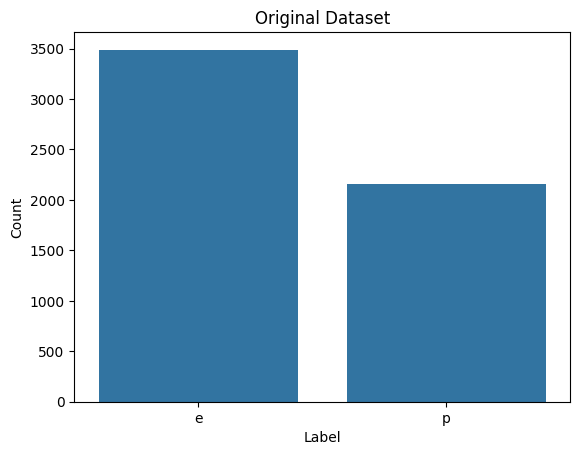

* save as Results/DistributedDataset/origin.png


<Figure size 640x480 with 0 Axes>

In [16]:
img_path = f"{CONFIG.distribution_dataset_dir}/origin.png"
plot_label_distribution(y, 'Original Dataset',img_path)

- Phân phối các tập con

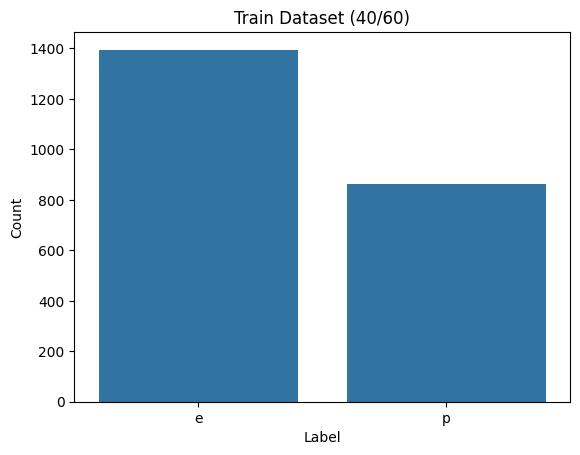

* save as Results/DistributedDataset/40_60_train.png


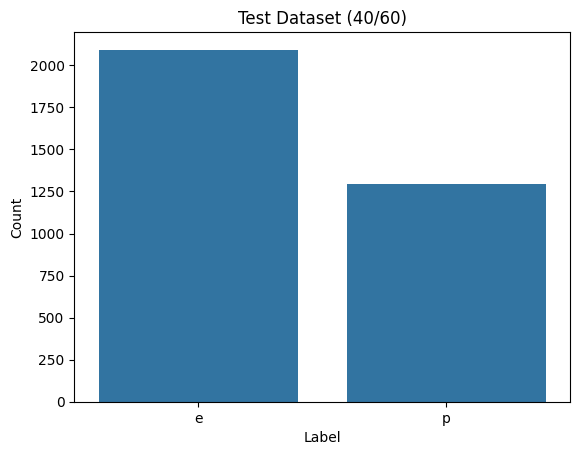

* save as Results/DistributedDataset/40_60_test.png


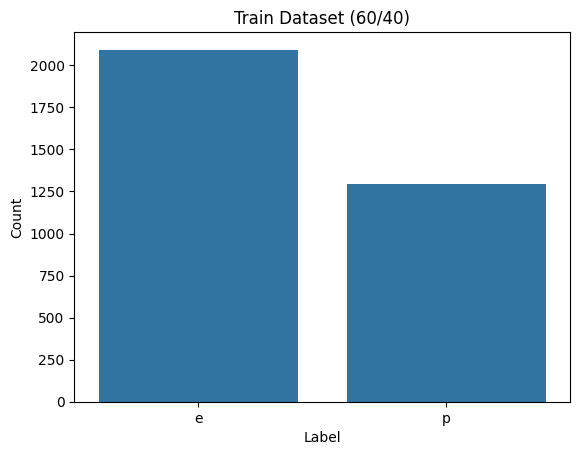

* save as Results/DistributedDataset/60_40_train.png


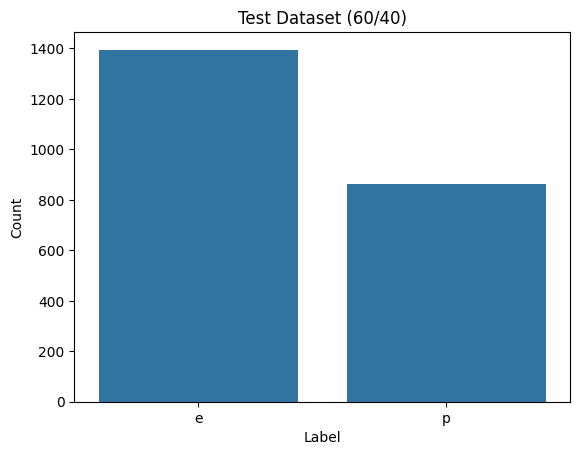

* save as Results/DistributedDataset/60_40_test.png


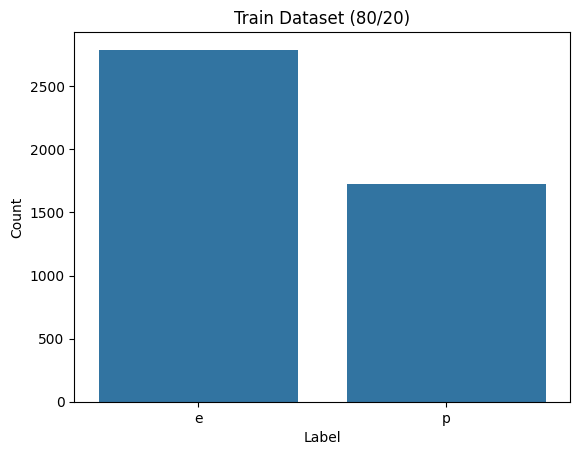

* save as Results/DistributedDataset/80_20_train.png


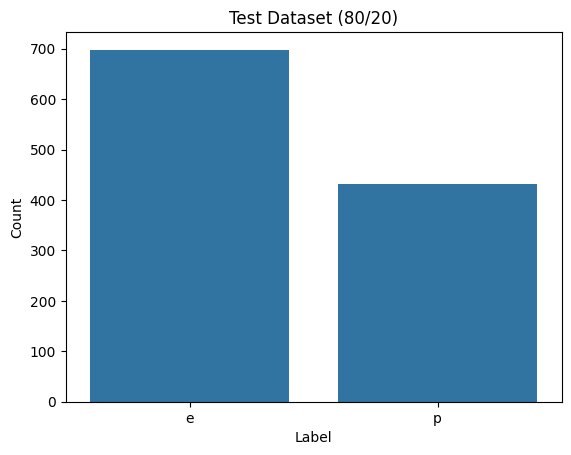

* save as Results/DistributedDataset/80_20_test.png


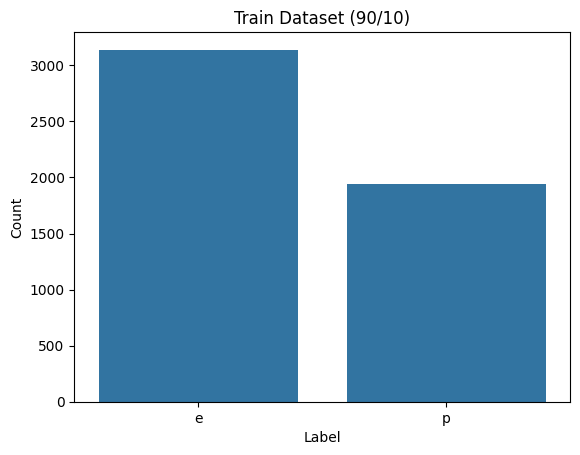

* save as Results/DistributedDataset/90_10_train.png


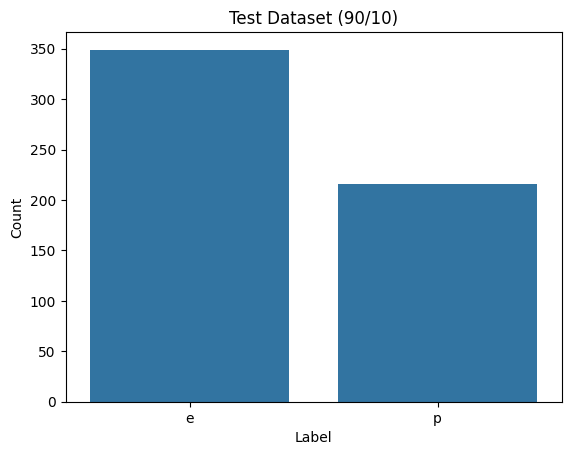

* save as Results/DistributedDataset/90_10_test.png


<Figure size 640x480 with 0 Axes>

In [17]:
for split_name, dataset in datasets.items():
    dir_path = f"{CONFIG.distribution_dataset_dir}/{split_name.replace('/','_')}"
    plot_label_distribution(dataset['label_train'], f'Train Dataset ({split_name})', f'{dir_path}_train.png')
    plot_label_distribution(dataset['label_test'], f'Test Dataset ({split_name})', f'{dir_path}_test.png')

## **2. Xây dựng bộ phân loại**

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import graphviz

- Hàm huấn luyện và trực quan hóa cây quyết định

In [19]:
def train_and_visualize(features_train, labels_train, features_test, labels_test, split_name):
    # Huấn luyện cây quyết định
    model = DecisionTreeClassifier(criterion='entropy', random_state=CONFIG.random_state)
    model.fit(features_train, labels_train)
    
    # Dự đoán trên tập kiểm tra
    predictions = model.predict(features_test)
    accuracy = accuracy_score(labels_test, predictions)
    
    # Giải mã để xem báo cáo
    labels_test_decoded = encoder_class.inverse_transform(labels_test)
    predictions_decoded = encoder_class.inverse_transform(predictions)

    # Dự đoán và đánh giá mô hình
    print(f"Results for split {split_name}")
    print("- Classification Report:")
    print(classification_report(labels_test_decoded, predictions_decoded))

    print(f"- Accuracy: {accuracy:.6f}")
    
    # Trực quan hóa cây quyết định
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=features_train.columns,
        class_names=encoder_class.classes_,
        filled=True, rounded=True, special_characters=True
    )
    graph = graphviz.Source(dot_data)
    filepath = f"{CONFIG.tree_visual_split_dir}/{split_name.replace('/', '_')}"
    graph.render(filepath, format="pdf")
    # graph.view()  # Mở cây trực tiếp
    # display(graph)
    print(f"- Saved tree visualization for {filepath}.pdf")
    print("------------------------------------------\n")

- Huấn luyện và lưu cây cho từng tập con

In [20]:
for split_name, dataset in datasets.items():
    train_and_visualize(
        features_train=dataset['feature_train'],
        labels_train=dataset['label_train'],
        features_test=dataset['feature_test'],
        labels_test=dataset['label_test'],
        split_name=split_name
    )

Results for split 40/60
- Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2093
           p       1.00      1.00      1.00      1294

    accuracy                           1.00      3387
   macro avg       1.00      1.00      1.00      3387
weighted avg       1.00      1.00      1.00      3387

- Accuracy: 1.000000
- Saved tree visualization for Results/TreeVisualizationsBySplit/40_60.pdf
------------------------------------------

Results for split 60/40
- Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1395
           p       1.00      1.00      1.00       863

    accuracy                           1.00      2258
   macro avg       1.00      1.00      1.00      2258
weighted avg       1.00      1.00      1.00      2258

- Accuracy: 1.000000
- Saved tree visualization for Results/TreeVisualizationsBySplit/60_40.pdf
------------

## **3. Đánh giá các bộ phân loại**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

- Hàm đánh giá mô hình và tạo báo cáo

In [22]:
def evaluate_model(features_test, labels_test, model, split_name):
    # Dự đoán trên tập kiểm tra
    predictions = model.predict(features_test)

    # Chuyển ngược về nhãn
    labels_test_decoded = encoder_class.inverse_transform(labels_test)
    predictions_decoded = encoder_class.inverse_transform(predictions)
    
    # Classification Report
    print("------------------------------------------\n")
    print(f"- Classification Report for split {split_name}")
    print(classification_report(labels_test_decoded, predictions_decoded))
    # print(classification_report(labels_test, predictions))

    # Confusion Matrix
    cm = confusion_matrix(labels_test, predictions)
    print(f"- Confusion Matrix for split {split_name}:\n{cm}")
    
    # Trực quan hóa ma trận nhầm lẫn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_order, yticklabels=class_order)
    plt.title(f"Confusion Matrix for {split_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    visual_path = f"{CONFIG.visual_confusion_matrix_dir}/{split_name.replace('/', '_')}.png"
    plt.savefig(visual_path)
    print(f"- Saved as: {visual_path}")
    plt.show()

    # Trả về mô hình và độ chính xác
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

- Lặp qua từng tập con để huấn luyện, đánh giá, và lưu kết quả

------------------------------------------

- Classification Report for split 40/60
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2093
           p       1.00      1.00      1.00      1294

    accuracy                           1.00      3387
   macro avg       1.00      1.00      1.00      3387
weighted avg       1.00      1.00      1.00      3387

- Confusion Matrix for split 40/60:
[[2093    0]
 [   0 1294]]
- Saved as: Results/VisualizationConfusionMatrix/40_60.png


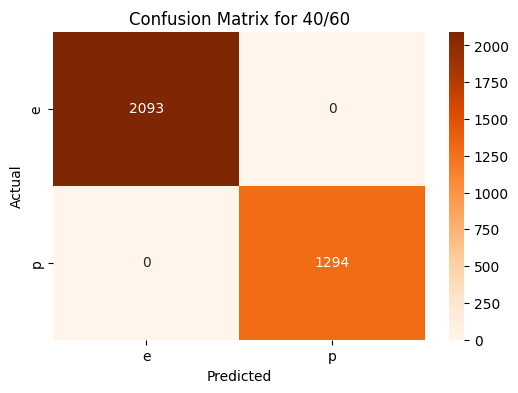

------------------------------------------

- Classification Report for split 60/40
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1395
           p       1.00      1.00      1.00       863

    accuracy                           1.00      2258
   macro avg       1.00      1.00      1.00      2258
weighted avg       1.00      1.00      1.00      2258

- Confusion Matrix for split 60/40:
[[1395    0]
 [   0  863]]
- Saved as: Results/VisualizationConfusionMatrix/60_40.png


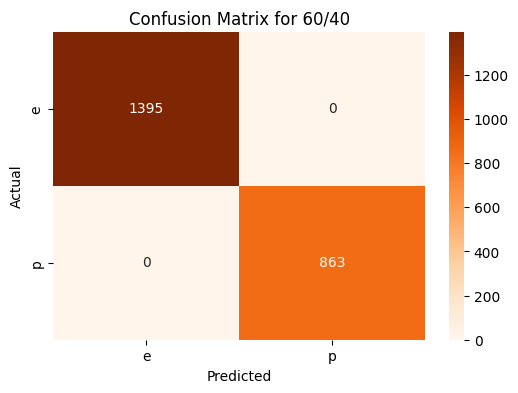

------------------------------------------

- Classification Report for split 80/20
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       698
           p       1.00      1.00      1.00       431

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

- Confusion Matrix for split 80/20:
[[698   0]
 [  0 431]]
- Saved as: Results/VisualizationConfusionMatrix/80_20.png


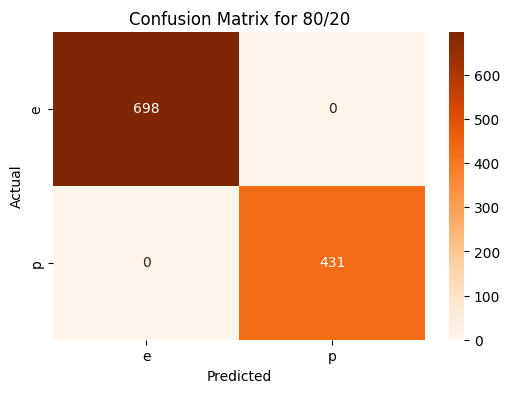

------------------------------------------

- Classification Report for split 90/10
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       349
           p       1.00      1.00      1.00       216

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

- Confusion Matrix for split 90/10:
[[349   0]
 [  0 216]]
- Saved as: Results/VisualizationConfusionMatrix/90_10.png


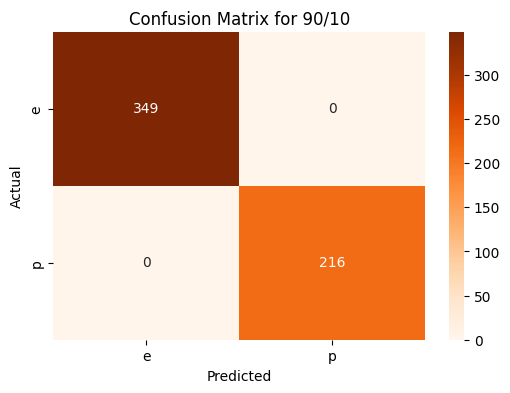

In [23]:
results = {}
for split_name, dataset in datasets.items():
    # Huấn luyện mô hình
    model = DecisionTreeClassifier(criterion='entropy', random_state=CONFIG.random_state)
    model.fit(dataset['feature_train'], dataset['label_train'])
    
    # Đánh giá mô hình
    accuracy = evaluate_model(
        features_test=dataset['feature_test'],
        labels_test=dataset['label_test'],
        model=model,
        split_name=split_name
    )
    
    # Lưu kết quả
    results[split_name] = accuracy

- Hiển thị tổng hợp kết quả độ chính xác

In [24]:
for split_name, accuracy in results.items():
    print(f"Accuracy for {split_name}: {accuracy:.6f}")

Accuracy for 40/60: 1.000000
Accuracy for 60/40: 1.000000
Accuracy for 80/20: 1.000000
Accuracy for 90/10: 1.000000


## **4. Độ sâu và độ chính xác**

- Lấy bộ dữ liệu huấn luyện và kiểm tra 80/20

In [25]:
X_train = datasets[CONFIG.default_split]['feature_train']
y_train = datasets[CONFIG.default_split]['label_train']
X_test  = datasets[CONFIG.default_split]['feature_test']
y_test  = datasets[CONFIG.default_split]['label_test']

- Thử nghiệm với các giá trị max_depth khác nhau

In [26]:
accuracy_scores = {}

for max_depth in CONFIG.max_depth_values:
    # Tạo và huấn luyện cây quyết định với max_depth
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=CONFIG.random_state)
    model.fit(X_train, y_train)
    
    # Dự đoán và tính độ chính xác
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[max_depth] = accuracy
    
    # Trực quan hóa cây quyết định
    print(f"Decision Tree with max_depth={max_depth}")
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=X_train.columns,
        class_names=encoder_feature.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    path = f"{CONFIG.tree_visual_max_depth_dir}/max_depth_{'none' if max_depth is None else max_depth}"
    graph.render(path, format="pdf")
    print(f"- Saved tree visualization for {path}.pdf")
    print("------------------------------------------\n")


Decision Tree with max_depth=None
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_none.pdf
------------------------------------------

Decision Tree with max_depth=2
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_2.pdf
------------------------------------------

Decision Tree with max_depth=3
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_3.pdf
------------------------------------------

Decision Tree with max_depth=4
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_4.pdf
------------------------------------------

Decision Tree with max_depth=5
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_5.pdf
------------------------------------------

Decision Tree with max_depth=6
- Saved tree visualization for Results/TreeVisualizationsWithMaxDepth/max_depth_6.pdf
------------------------------------------

Decision Tree with max_depth

- Hiển thị bảng kết quả

In [27]:
print("max_depth\tAccuracy")
for max_depth, accuracy in accuracy_scores.items():
    print(f"{'None' if max_depth is None else max_depth}\t\t{accuracy:.6f}")

max_depth	Accuracy
None		1.000000
2		0.932684
3		0.947741
4		0.988485
5		1.000000
6		1.000000
7		1.000000


- Vẽ biểu đồ độ chính xác

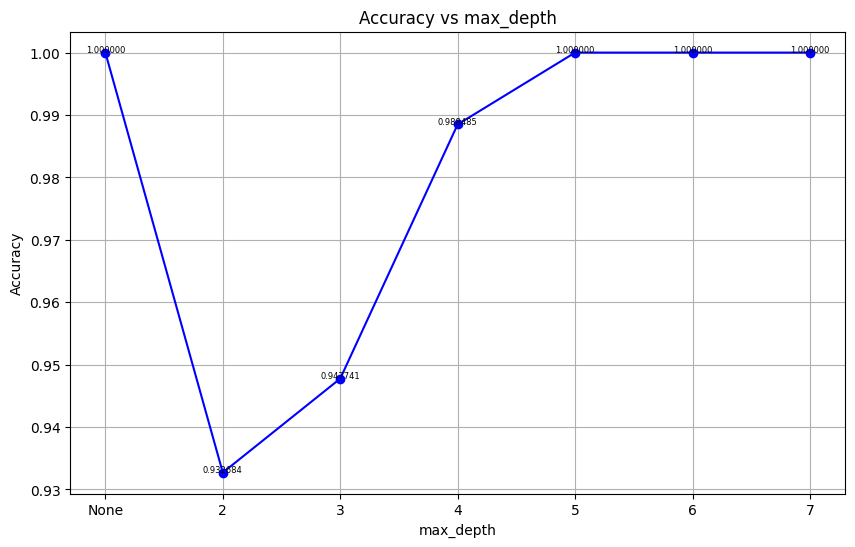

In [28]:
depth_labels = ['None' if d is None else d for d in CONFIG.max_depth_values]
accuracy_values = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, accuracy_values, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
for i, txt in enumerate(accuracy_values):
    plt.text(i, accuracy_values[i], f"{accuracy_values[i]:.6f}", fontsize=6, ha='center')

plt.show()
